### Develop a program to apply K-means algorithm to cluster a set of data. Use the same data set for clustering using EM algorithm. Compare the results of these two algorithms and comment on the quality of clustering.

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [5]:
X.max()

Sepal_Length    7.9
Sepal_Width     4.4
Petal_Length    6.9
Petal_Width     2.5
dtype: float64

In [6]:
X.mean()

Sepal_Length    5.843333
Sepal_Width     3.057333
Petal_Length    3.758000
Petal_Width     1.199333
dtype: float64

D:\Anaconda installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Petal Width')

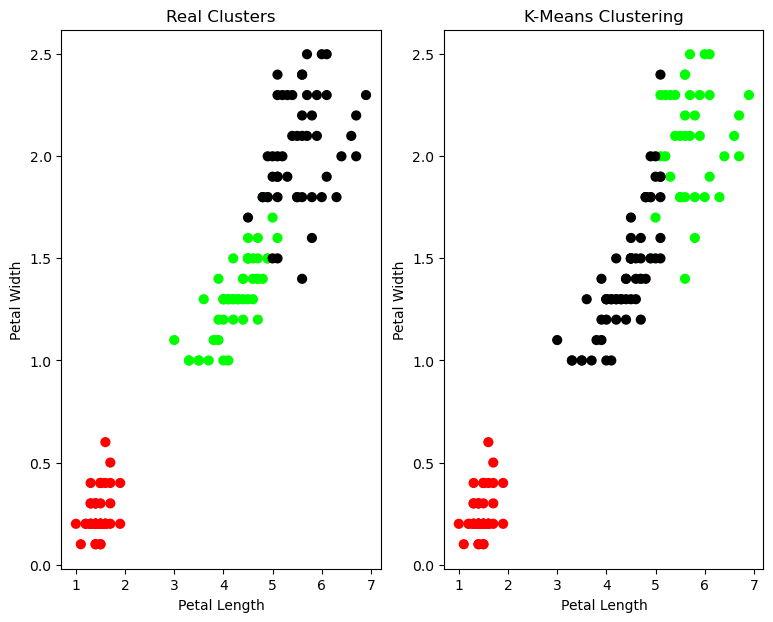

In [79]:
# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [99]:
xs.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.
The accuracy score of K-Mean:  0.09333333333333334
The accuracy score of EM:  0.3333333333333333


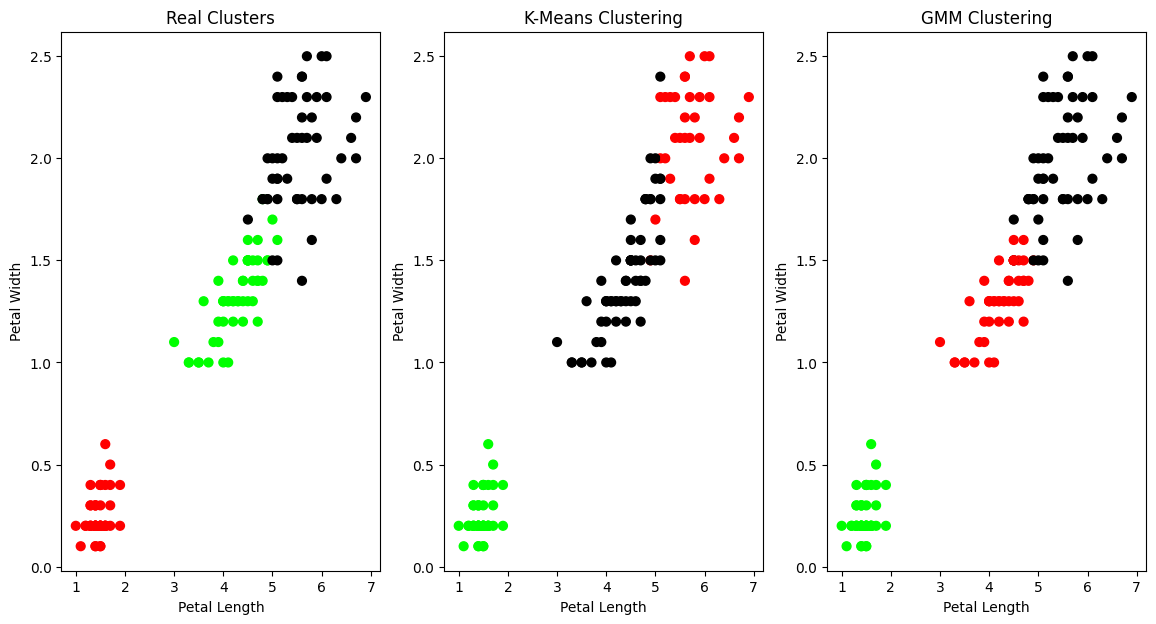

In [ ]:
# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have mean value=0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The accuracy score of EM: ',metrics.accuracy_score(y, gmm_y))

In [2]:
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2
